In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kruskal 

In [250]:
#Loading data
df = pd.read_csv("Data/insurance - insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 3 Question to Answer:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [251]:
#Checking samples for each sex
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

# Non Smokers vs. Smokers Insurance Charges

1.State your Null Hypothesis and Alternative Hypothesis

   * Null Hypothesis: There is no difference in insurance charges with non-smokers and smokers.
    
   * Alternative Hypothesis: There is a significant difference in insurance charges between non-smokers and smokers.

2.Select the correct test according to the data type and number of samples

   * 2 Sample T-Test (independent)

3.Test the assumptions of your selected test.

   *  No significant outliers
   *  Normality
   *  Equal Variance


4.Execute the selected test, or the alternative test (if you do not meet the assumptions)
   
   * I'll be looking out for the p-value from the .levene variance test to determine whether to use `equal_var = False` when running the T-Test.

5.Interpret your p-value and reject or fail to reject your null hypothesis 
 
    
6.Show a supporting visualization that helps display the result


## Testing for Outliers



In [252]:
#Checking the number of smokers to see if our sample is enough
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [253]:
#Splitting up data between smokers and non smokers
non_smoker = df.loc[df["smoker"]=="no"].copy()
smoker = df.loc[df["smoker"]=="yes"].copy()

In [254]:
#Define our feature of interest
non_smoker_charges = non_smoker["charges"]
smoker_charges = smoker["charges"]

## Check for and remove outliers

In [255]:
# Check for outliers in charges for non-smoker group
zscores = stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [256]:
# remove outliers from non-smoker group
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [257]:
# Check for outliers in charges for smoker group
zscores = stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [258]:
# remove outliers from smoker group
smoker_charges = smoker_charges[(np.abs(stats.zscore(smoker_charges)) < 3)]

## Check for Normality



In [259]:
#Checking for normality in non-smokers
result_non_smokers = stats.normaltest(non_smoker_charges)
result_non_smokers

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

pvalue for non-smokers is > .05, meaning that it is normal distribution

In [260]:
#checking for normalitiy in smokers
result_smokers = stats.normaltest(smoker_charges)
result_smokers

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

pvalue for smokers is < .05, meaning that it is NOT a normal distribution. However, our sample size is large enough to proceed without satisfying this test.  For an independent t-test, sample sizes of 15 per group are considered sufficient.



## Check for Equal Variance

In [261]:
# Test for equal variance
result = stats.levene(non_smoker_charges, smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Smokers vs. Non-smokers doesnt have equal variance (pvalue > .05) but I will use `equal_var = False` when we perform our t-test.

## Perform and evaluate the t-test

In [262]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

The p-value < .05, so i reject the null hypothesis and find significance in charges between smokers and non-smokers.

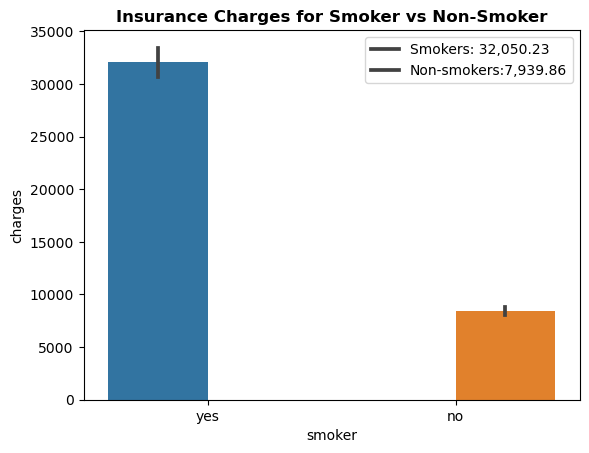

In [263]:
data = smoker_charges
data2= non_smoker_charges
smoker_mean = np.mean(data)
non_smoker_mean = np.mean(data2)
fig, ax = plt.subplots()
sns.barplot(df, x=df["smoker"], y=df["charges"], hue="smoker")
ax.set_title("Insurance Charges for Smoker vs Non-Smoker", weight="bold")
ax.legend(labels=[f"Smokers: {smoker_mean:,.2f}",f"Non-smokers:{non_smoker_mean:,.2f}"]);

# Are men more likely to smoke than women?

1. State your Null Hypothesis and Alternative Hypothesis
    * Null Hypothesis: Neither men or woman are more likely to smoke.
    * Alternative Hypothesis: There is a significant difference in the likeliness of smoking between men vs. women.

2. Select the correct test according to the data type and number of samples
    * Chi-Squared test

3. Test the assumptions of your selected test.
    * There are two categorical variables (ordinal or nominal)
    * The outcomes are independent.
    
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)


5. Interpret your p-value and reject or fail to reject your null hypothesis 


6. Show a supporting visualization that helps display the result

In [264]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [265]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [266]:
#Checking if our results are significant
print(p)
p < .05

0.006548143503580696


True

We reject the null hypothesis that sex is not an influence on smoking.

In [395]:
#Filtering smoker data to use in plot
smoker_data = df[df['smoker'] == 'yes']
smoker_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [410]:
smokers = df["smoker"] == "yes"
gender_smoker_avg = df.groupby(smokers)["sex"].value_counts()

gender_smoker_avg= gender_smoker_avg[True]
gender_smoker_avg

sex
male      159
female    115
Name: sex, dtype: int64

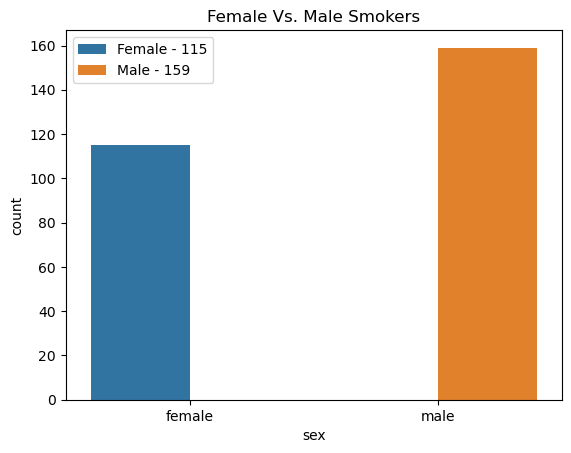

In [437]:
fig, ax = plt.subplots()
sns.countplot(smoker_data, x="sex", hue="sex")
ax.set_title("Female Vs. Male Smokers")
ax.legend(labels=[f"Female - {gender_smoker_avg[1]}", f"Male - {gender_smoker_avg[0]}" ]);

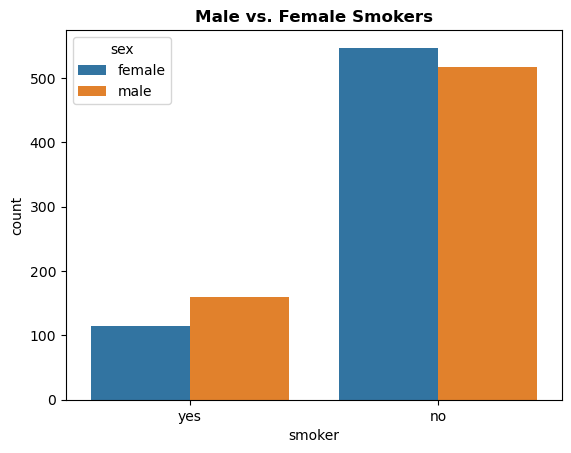

In [398]:
smoker_data = df[df['smoker'] == 'yes']

fig, ax = plt.subplots()
sns.countplot(df, x=df["smoker"], hue="sex")
ax.set_title("Male vs. Female Smokers", weight="bold");

# Do different regions have different charges, on average?

1. State your Null Hypothesis and Alternative Hypothesis
    * Null Hypothesis: There is no significant difference in average charges among the different regions.

    * Alternative Hypothesis: There is a significant difference in average charges among the different regions.

2. Select the correct test according to the data type and number of samples
    * ANOVA

3. Test the assumptions of your selected test.
    * No significant outliers
    * Equal variance
    * Normality
    
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)


5. Interpret your p-value and reject or fail to reject your null hypothesis 


6. Show a supporting visualization that helps display the result

## Separating Our Groups

In [273]:
#Checking the size of the group
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [274]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
region_group = {}
## Loop through all unique categories
for i in df["region"].unique():
    ## Get series for group and rename
    data = df.loc[df["region"] == i, "charges"].copy()
    
    # save into the dictionary
    region_group[i] = data
region_group.keys()    

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Testing Assumptions


### Normality Test

In [275]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in region_group.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {"n": len(data),
                      "p":p,
                      "test stat":stat}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [276]:
### checking sig with pandas 
norm_results_df["sig"] = norm_results_df["p"] < .05
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


These groups do not have a normal distribution. However, "If your group sizes (n) are large enough, we can safely ignore the normality assumption."

### Testing Assumption of Unequal Variance


In [277]:
# with the * operator 
stats.levene(*region_group.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Levene pvalue < .05, so this is showing it is NOT of equal variance. Meaning that we reject the null hypothesis.

### Checking for Outliers

In [278]:
## Loop through groups dict
for i, data in region_group.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {i} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    region_group[i] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


### Kruskal Test

In [279]:
# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*region_group.values())

print(f"Kruskal Result: statistic={h_statistic}, pvalue={p_value}")
# Interpret the result
print("Charges do not significantly differ among the regions.")

Kruskal Result: statistic=6.914045702545643, pvalue=0.07468847911322242
Charges do not significantly differ among the regions.


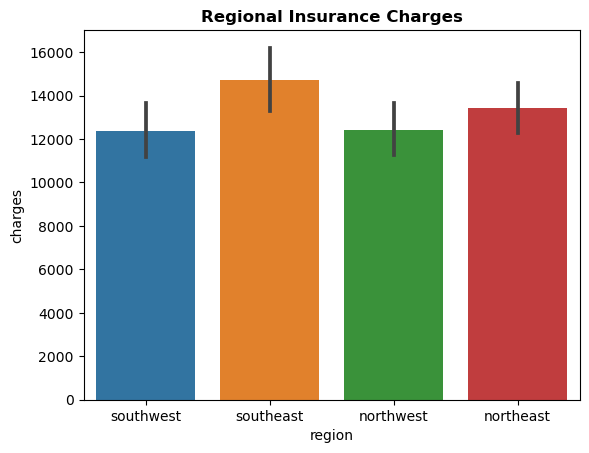

In [289]:
#plotting charges vs regions
fig, ax = plt.subplots()
sns.barplot(df, x=df["region"], y=df["charges"])
ax.set_title("Regional Insurance Charges", weight="bold");